# **SPOT-your-FI**

## Libraries

In [20]:
%matplotlib inline
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn
from wordcloud import WordCloud # Import for Word Cloud

## Dataset Formulation

In [21]:
df = pd.read_json("StreamingHistory0.json") # Load the JSON File into a dataframe
df.head() # Read first few lines of the dataframe

,endTime,artistName,trackName,msPlayed
0,2021-08-03 20:32,Maroon 5,Remedy (feat. Stevie Nicks),131328
1,2021-08-04 00:30,The Score,Never Going Back,197680
2,2021-08-04 00:33,The Score,Legend,189120
3,2021-08-04 00:37,The Score,Only One,227853
4,2021-08-04 00:41,The Score,Tightrope,233666


In [22]:
# As we have two files of 10,000 entries each, We'll join them both
df1 = pd.read_json("StreamingHistory0.json") # Read the first file
df2 = pd.read_json("StreamingHistory1.json") # Read the second file
df3 = pd.read_json("StreamingHistory2.json")
df4 = pd.read_json("StreamingHistory3.json")


In [23]:
df1.head()

,endTime,artistName,trackName,msPlayed
0,2021-08-03 20:32,Maroon 5,Remedy (feat. Stevie Nicks),131328
1,2021-08-04 00:30,The Score,Never Going Back,197680
2,2021-08-04 00:33,The Score,Legend,189120
3,2021-08-04 00:37,The Score,Only One,227853
4,2021-08-04 00:41,The Score,Tightrope,233666


In [24]:
df1.tail()

,endTime,artistName,trackName,msPlayed
9995,2021-11-11 11:56,BØRNS,Electric Love,218097
9996,2021-11-11 12:12,The Vamps,Somebody To You,179264
9997,2021-11-11 12:12,Jack & Jack,No One Compares To You,1194
9998,2021-11-11 12:16,Khalid,Up All Night,8320
9999,2021-11-11 12:16,Why Don't We,I Don't Belong In This Club,222474


In [25]:
df2.head()

,endTime,artistName,trackName,msPlayed
0,2021-11-11 12:32,Alan Walker,Different World (feat. CORSAK),202906
1,2021-11-11 12:33,Alan Walker,Interlude,36847
2,2021-11-11 12:36,Alan Walker,Different World (feat. CORSAK),202906
3,2021-11-11 12:37,Alan Walker,Interlude,18224
4,2021-11-11 12:37,Alan Walker,All Falls Down (feat. Juliander),572


In [26]:
df2.tail()

,endTime,artistName,trackName,msPlayed
9995,2022-02-02 03:21,The Chainsmokers,Honest,189182
9996,2022-02-02 03:24,Greyson Chance,Good As Gold,145125
9997,2022-02-02 03:41,Imagine Dragons,Enemy (with JID) - from the series Arcane Leag...,173381
9998,2022-02-02 04:10,Jonas Blue,Mama,184133
9999,2022-02-02 04:13,Tate McRae,bad ones,183133


In [27]:
# Concatenating both datasets
spotify_stream_df = pd.concat([df1,df2,df3,df4], ignore_index=True)
spotify_stream_df.to_csv("spotif_data1.csv") # Saving csv data
spotify_stream_df # Reading the dataframe at once



,endTime,artistName,trackName,msPlayed
0,2021-08-03 20:32,Maroon 5,Remedy (feat. Stevie Nicks),131328
1,2021-08-04 00:30,The Score,Never Going Back,197680
2,2021-08-04 00:33,The Score,Legend,189120
3,2021-08-04 00:37,The Score,Only One,227853
4,2021-08-04 00:41,The Score,Tightrope,233666
...,...,...,...,...
38000,2022-08-04 20:35,Ber,Meant To Be,163215
38001,2022-08-04 20:38,Imagine Dragons,Lonely,159826
38002,2022-08-04 20:45,Imagine Dragons,Whatever It Takes,252014
38003,2022-08-04 20:48,Imagine Dragons,Whatever It Takes,201128


### Formating the Dataset to more informational one by splitting the Time constraints

In [28]:
#creating an additional column
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"])
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)


## Exploratory Data Analysis (EDA)

### checking basic stats of the Dataset

In [29]:
spotify_stream_df.describe()

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,38005.000000,38005.000000,38005.000000,38005.000000,38005.000000,38005.0,38005.000000,38005.000000
mean,2021.585555,6.426918,15.815735,2.968846,10.409394,1.0,0.043600,2.615916
std,0.492633,3.647245,8.844561,2.027357,5.529978,0.0,0.023172,1.389605
min,2021.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2021.000000,3.000000,8.000000,1.000000,6.000000,1.0,0.029000,1.767000
50%,2022.000000,7.000000,16.000000,3.000000,10.000000,1.0,0.050000,3.017000
75%,2022.000000,10.000000,24.000000,5.000000,15.000000,1.0,0.058000,3.500000
max,2022.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.279000,16.767000


### Shape of the Dataset


In [30]:
spotify_stream_df.shape 

(38005, 13)

### Checking the type and information of the data

In [31]:
spotify_stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   artistName               38005 non-null  object        
 1   trackName                38005 non-null  object        
 2   Play-Time                38005 non-null  datetime64[ns]
 3   year                     38005 non-null  int64         
 4   month                    38005 non-null  int64         
 5   day                      38005 non-null  int64         
 6   weekday                  38005 non-null  int64         
 7   time                     38005 non-null  object        
 8   hours                    38005 non-null  int64         
 9   day-name                 38005 non-null  object        
 10  Count                    38005 non-null  int64         
 11  Listening Time(Hours)    38005 non-null  float64       
 12  Listening Time(Minutes)  38005 n

### Checking all the unique data

In [32]:
spotify_stream_df.nunique()

artistName                   771
trackName                   2436
Play-Time                  34649
year                           2
month                         12
day                           31
weekday                        7
time                        1427
hours                         24
day-name                       7
Count                          1
Listening Time(Hours)        156
Listening Time(Minutes)      459
dtype: int64

### Taking a random sample from dataset

In [33]:
spotify_stream_df.sample(10)

,artistName,trackName,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Listening Time(Hours),Listening Time(Minutes)
29552,Samuel Lim,Eleanor,2022-05-06 06:56:00,2022,5,6,4,06:56:00,6,Friday,1,0.008,0.500
1214,Sam Smith,Diamonds,2021-08-14 14:36:00,2021,8,14,5,14:36:00,14,Saturday,1,0.059,3.550
4767,Craig David,Walking Away,2021-09-24 18:37:00,2021,9,24,4,18:37:00,18,Friday,1,0.002,0.150
17515,Imagine Dragons,Bullet In A Gun,2022-01-14 11:10:00,2022,1,14,4,11:10:00,11,Friday,1,0.057,3.400
14431,Leo Stannard,Gravity,2021-12-18 15:28:00,2021,12,18,5,15:28:00,15,Saturday,1,0.013,0.800
29504,Before You Exit,Silence,2022-05-05 09:55:00,2022,5,5,3,09:55:00,9,Thursday,1,0.056,3.333
16268,The Score,Running All Night,2022-01-04 16:09:00,2022,1,4,1,16:09:00,16,Tuesday,1,0.056,3.383
22388,Conan Gray,Maniac,2022-02-18 11:04:00,2022,2,18,4,11:04:00,11,Friday,1,0.051,3.083
17109,Tate McRae,r u ok,2022-01-11 09:47:00,2022,1,11,1,09:47:00,9,Tuesday,1,0.052,3.117
921,Cecilia Krull,My Life Is Going On (Música Original De La Ser...,2021-08-11 01:49:00,2021,8,11,2,01:49:00,1,Wednesday,1,0.059,3.567


### Calculating Percentage of non-unique Artist

In [34]:

#Setting basics for pie-chart
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Unique artist in dataset
unique_artists = spotify_stream_df["artistName"].nunique() 
# Total artist in dataset
total_artists = spotify_stream_df["artistName"].count() 
# Get the percentage of the unique
unique_artist_percentage = unique_artists/total_artists*100 
print("Number of Unique Artists  - ", unique_artists)
print("Percentage of Unique Artists - ", unique_artist_percentage)

Number of Unique Artists  -  771
Percentage of Unique Artists -  2.0286804367846334


#### Plotting

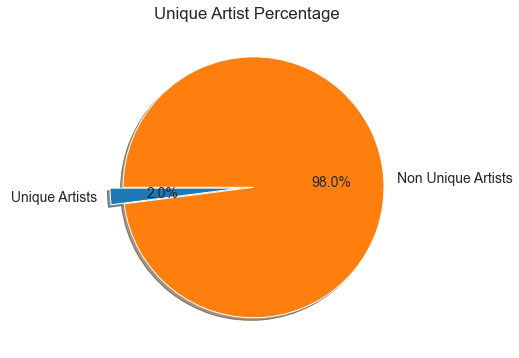

In [35]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage");

### Unique Songs


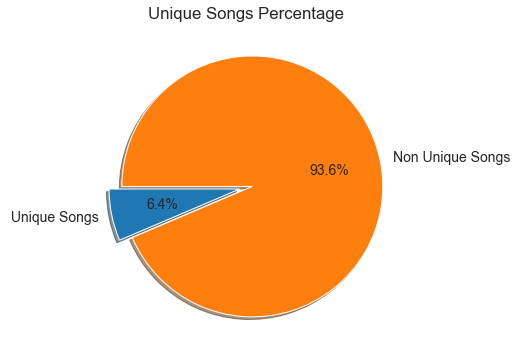

In [36]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

### Favrourite Artists (Based on hours)

In [37]:
# Grouping the Artists and sorting them
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Imagine Dragons,172.887,10376.069,3852
The Score,92.968,5583.636,2051
The Chainsmokers,88.584,5318.429,1990
5 Seconds of Summer,72.643,4359.173,1639
The Cab,33.061,1986.372,666
Why Don't We,32.705,1964.119,874
Alan Walker,32.451,1945.063,806
The Vamps,27.842,1670.618,674
Maroon 5,27.617,1660.685,637


### Plotting Bargraph

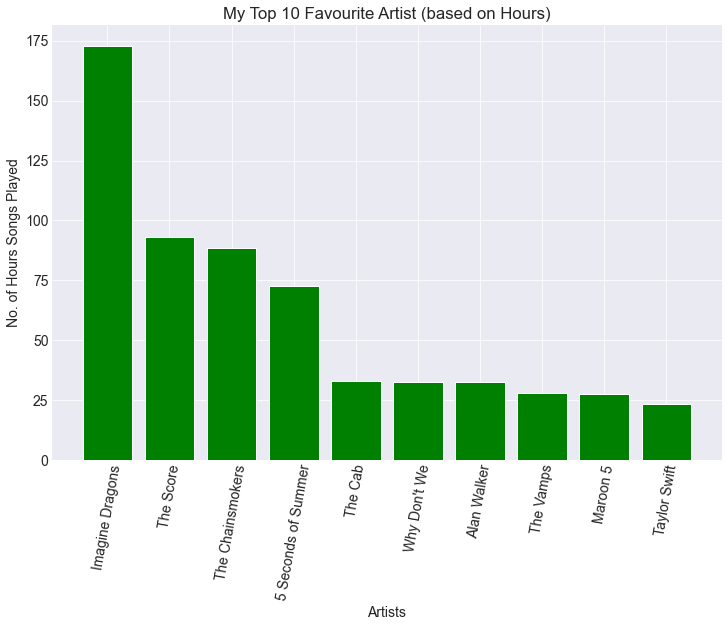

In [38]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=80);

### Favrourite Artists (Based on number of songs listened)


#### Dataset

In [39]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Imagine Dragons,172.887,10376.069,3852
The Score,92.968,5583.636,2051
The Chainsmokers,88.584,5318.429,1990
5 Seconds of Summer,72.643,4359.173,1639
Why Don't We,32.705,1964.119,874
Alan Walker,32.451,1945.063,806
The Vamps,27.842,1670.618,674
The Cab,33.061,1986.372,666
Maroon 5,27.617,1660.685,637


#### Plotting

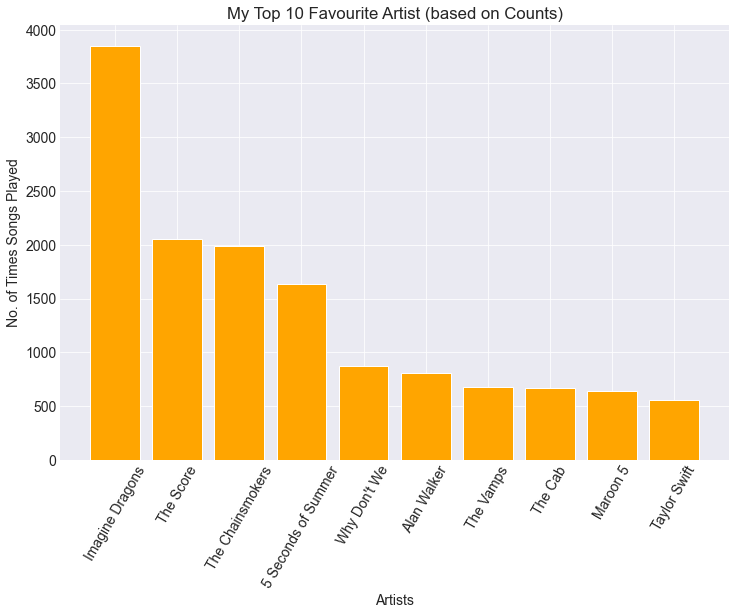

In [40]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='orange')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=60);

### Comparing Artists (Based on hours and counts )

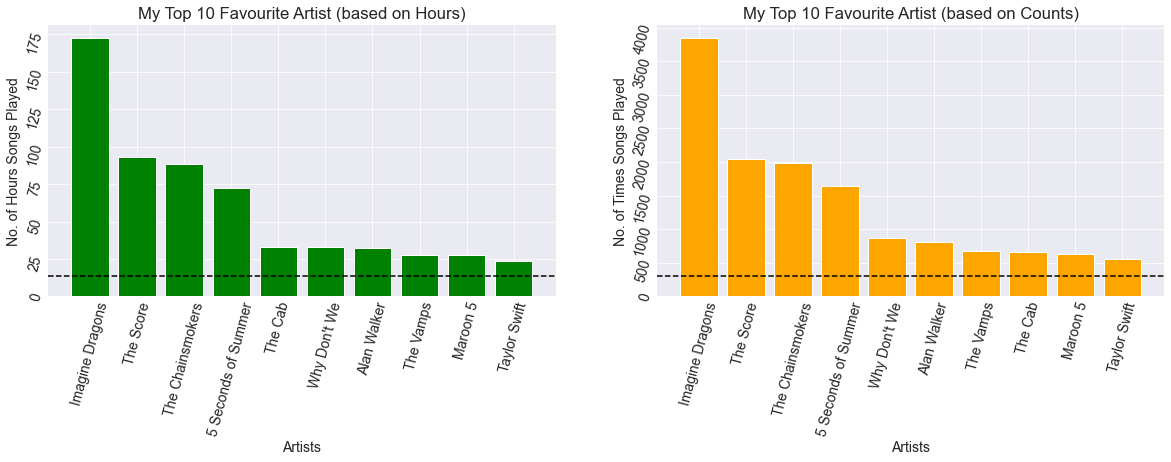

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

# Setting up our seecond graph
ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

### Favourite Artist

In [42]:
fav_artist = spotify_stream_df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Imagine Dragons          3852
The Score                2051
The Chainsmokers         1990
5 Seconds of Summer      1639
Why Don't We              874
                         ... 
GAYLE                      80
Glass Animals              80
benny blanco               79
Engelbert Humperdinck      76
One Direction              74
Name: Count, Length: 100, dtype: int64

#### Wordplot Presentation

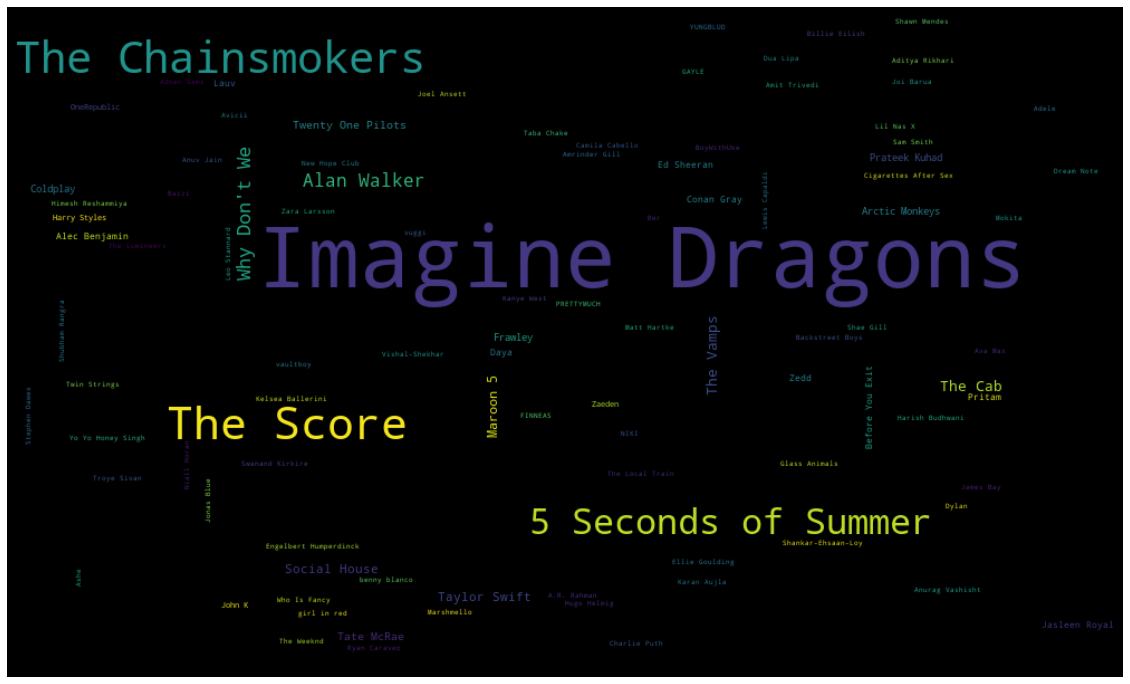

In [56]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

### Comparing Songs (Based on hours and times it is played )

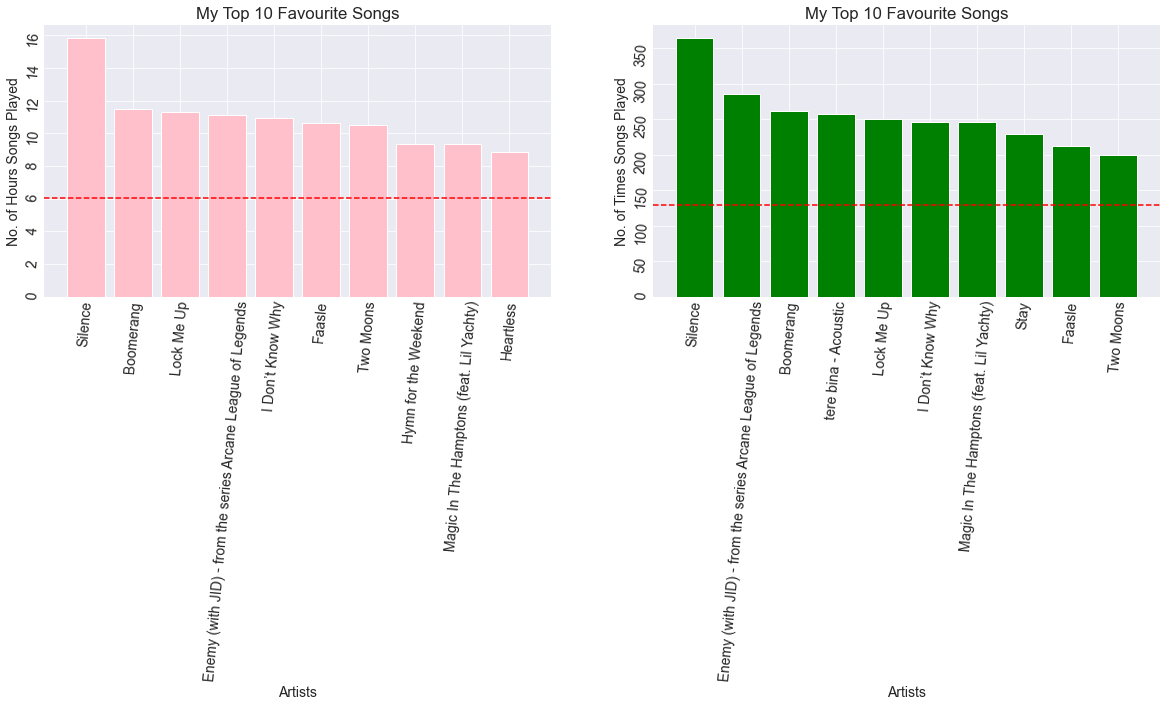

In [44]:
# Grouping songs based on hours
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
# Grouping songs based on counts
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="pink")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=85);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# Setting up our second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="green")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=85);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

### Time wise % use (Year, Month, Day, Hours)

#### EDA

In [45]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() # Summation of all 

date_df = spotify_stream_df["Play-Time"] # Making a new dataset of time only
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D") # Calulating total possible days in days
time_difference_hours = time_difference*24 # Converting that in hours by multiplying with 24
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date # Creating a new column with date
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)

print("Total Times spent on spotify in hours - ",time_spent_hours)


Total Times spent on spotify in hours -  1657.005


In [46]:
most_songs.head(5)

,Count
date,
2022-02-05,207
2022-02-15,201
2021-11-01,200
2021-10-29,195
2021-11-21,194


#### Months

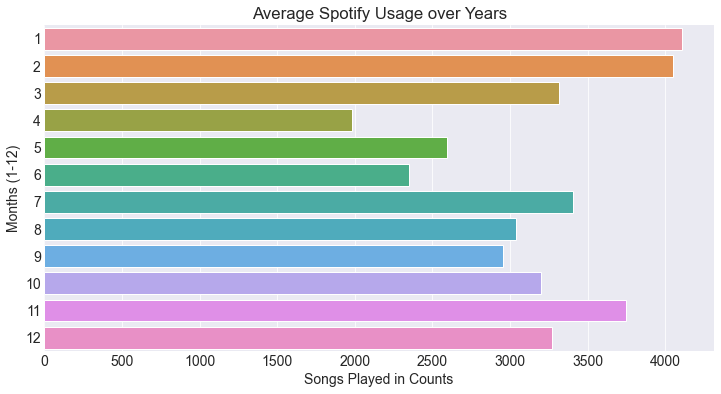

In [47]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

#### Day wise Analysis

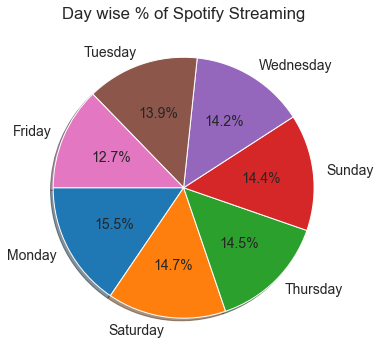

In [48]:
# Here we'll try to analyse whats is the percentage usage of Spotify Streaming over a Week.

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(spotify_stream_df["day-name"].value_counts(), labels=spotify_stream_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="Day wise % of Spotify Streaming");

##### Max number of songs played in a day

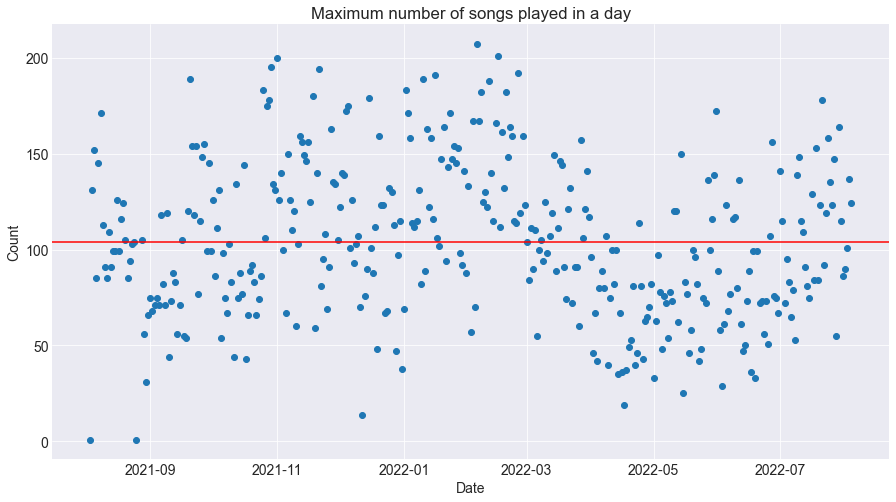

In [49]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

#### Hours wise analysis

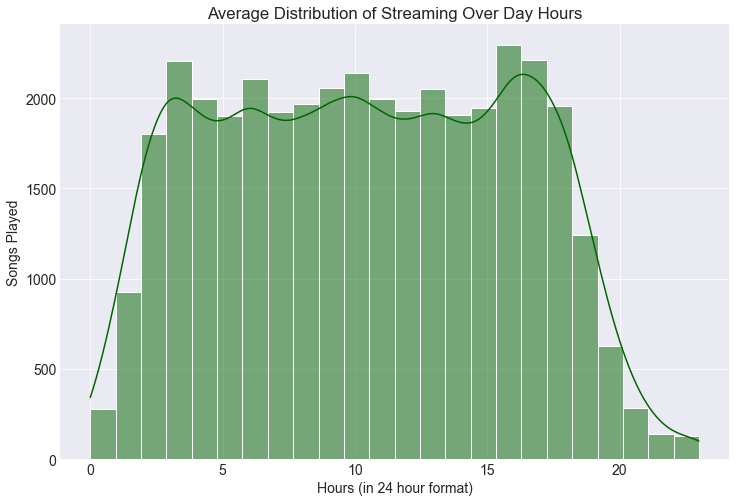

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

## Genrating Playlist


In [51]:
my_fav_artist_playlist = spotify_stream_df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist.to_csv("My_fav_playlist.csv")
my_fav_artist_playlist

Count
artistName      trackName                                                
Before You Exit Silence                                               327
Imagine Dragons Enemy (with JID) - from the series Arcane Leagu...    286
                Boomerang                                             262
Zaeden          tere bina - Acoustic                                  258
The Cab         Lock Me Up                                            250
...                                                                   ...
Twin Strings    Dhalti Rahe                                            85
Tate McRae      bad ones                                               85
Hugo Helmig     Champagne Problems                                     85
Sam Smith       Diamonds                                               85
Imagine Dragons Walking The Wire                                       83

[100 rows x 1 columns]